# Tutoriel de résolution d'un problème de machine learning

## Problématique étudiée

La problématique étudiée est le cas avec le dataset iris. L'objectif de ce cas est de reconnaître les classes de fleurs à partir de leurs charactèristiques notées dans une base de données disponsible.

Il s'agit donc d'un cas de **machine learning non-supervisé**, et plus spécifiquement d'un cas de **classification**.

Ce notebook va vous guider à travers ce cas concret de classification, et va utiliser un modèle particulier de machine learning pour réaliser cette tâche : les *machines à vecteurs de support* (ou *support-vector machines (SVM)* en anglais). Les parties suivantes sont dédiées à l'implémentation de ce modèle grâce à l'utilisation de la librairie scikit-learn.

<span style='color:red'>Correction de Justine en rouge</span>

<span style='color:red'>Il me semble que le dataset iris devait être traité avec un autre modèle de ML, du clustering car c'est de l'apprentissage non supervisé. Tu pouvait utiliser par exemple les Kmeans. </span>

## Code

### Importation des différentes librairies 

In [23]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
import numpy as np

### Importation du dataset 

La première étape est d'importer le dataset et de voir de quoi il est constitué. Ici on importe le dataset iris.

In [24]:
# Import the iris dataset
iris = datasets.load_iris()

In [25]:
# Dataset description
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

On voit grâce à la description détaillée qu'il s'agit d'un dataset qui cherche à faire de la reconnaissance optique de plantes iris (grâce au titre), puis qu'il contient 150 exemples de fleurs, avec 4 *attributes* par fleur. Il se trouve que l'on comprend ensuite que ces *attributes* sont directement les longueurs et largeurs en centimètres des sépales et pétales de chacune des 150 fleurs disponibles (c'est la partie *attribute information* qui nous renseigne là-dessus). 

Nous sommes donc en possession de 150 instances de 4 mesures qui représentent des fleurs.

Pour s'en assurer nous représentons quelques-unes de ces fleurs : (to remove maybe)

<span style='color:red'>Je ne comprend pas le 'to remove maybe', tu veux afficher les fleurs pour voir si il faut en enlever ? </span>

Purple: setosa
Green: versicolor
Yellow: virginica


Text(0, 0.5, 'petal width (cm)')

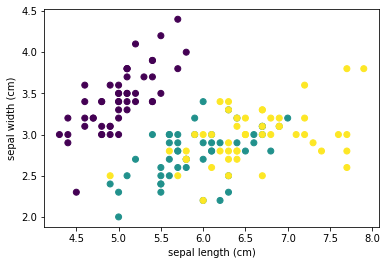

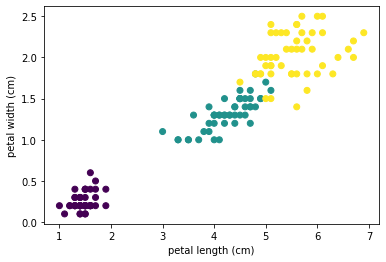

In [26]:
# Plotting some data to show what they look like
print("Purple: " + iris.target_names[0] +
      "\nGreen: " + iris.target_names[1] +
      "\nYellow: " + iris.target_names[2])

fig, ax = plt.subplots()
ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

fig, ax = plt.subplots()
ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

<span style='color:red'>Je trouve ça très bien du visulaiser les groupes en fonction de la tailles des pétales et des sépales, tu aurais pu mettre une conclusion sur ces visualisations. Ex : on voit que les pétales permettent de créer de meilleurs clusters.  </span>

### Phase d'apprentissage du modèle

La première étape lors de l'utilisation d'une méthode d'apprentissage, c'est l'apprentissage. Dans cette étape, nous allons construire notre modèle en lui donnant un certain nombre d'exemples depuis notre base de données. La règle de base lors de cette étape est de séparer la base de données en deux : une partie pour l'apprentissage et une partie pour le test. Ceci afin de ne pas montrer lors de la phase de test des exemples de fleurs qui auraient servis lors de la phase d'apprentissage, car alors le test serait biaisé.

Pour pouvoir apprendre un modèle, ce dernier a besoin de *features*, c'est-à-dire des nombres en entrée, servant à décrire nos charactèristiques dans un *langage* compris par la machine. Néanmoins, notre base de données contient déjà des nombres pour charactèristiques, et donc peut être directement entrées dans la machine.

In [27]:
data = iris.data

Puis, nous divisons notre jeu de données d'entrée en deux sous-ensembles, afin de constituer nos jeux de données d'apprentissage (constitué ici de 60 % des données de départ), et de test (40 % des données de départ).

In [28]:
# Split data with 60% to train and 40% to test
X_train, X_test, y_train, y_test = train_test_split(
    data, iris.target, test_size=0.4, shuffle=True
)

Puis nous choisissons le modèle à mettre en place, nous l'apprenons, et nous le testons dans la foulée :

In [29]:
# Create an instance of SVM and fit out data
clf = svm.SVC(kernel="poly", degree=3, gamma="auto", C=1.0)

# Learn the flowers on the train subset
clf.fit(X_train, y_train)

# Predict the flower class on the test subset
predicted = clf.predict(X_test)

Enfin, nous regardons quelques résultats de prédiction, pour voir de manière qualitative si le modèle semble bien fonctionner.

Predictions:
[2 2 0 2 2 0 1 0 0 0 2 1 0 2 0 1 2 2 2 1 0 1 1 2 0 2 2 2 1 0 1 2 1 1 0 1 0
 0 2 0 2 2 1 0 1 1 0 0 2 1 0 0 0 0 2 2 0 1 2 1]
Targets:
[2 2 0 2 2 0 1 0 0 0 2 1 0 1 0 1 2 2 2 1 0 1 1 2 0 2 2 2 1 0 1 2 1 1 0 1 0
 0 2 0 2 2 1 0 2 1 0 0 2 1 0 0 0 0 2 2 0 1 2 1]


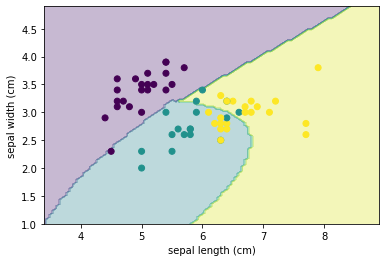

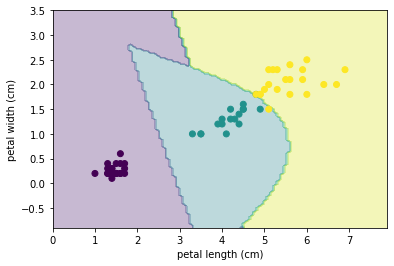

In [30]:
# Printing the predictions
print("Predictions:")
print(predicted)
print("Targets:")
print(y_test)

# Creating instances of predictions only using 2 dimensions
clf_2d = svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
clf_2d.fit(X_train[:, :2], y_train)
clf_2db = svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
clf_2db.fit(X_train[:, 2:], y_train)

# Plotting the 2d predictions
# (only to get a better view of it)
fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    clf_2d, X_test[:, :2], ax=ax, alpha=0.3,
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    clf_2db, X_test[:, 2:], ax=ax, alpha=0.3,
    xlabel=iris.feature_names[2], ylabel=iris.feature_names[3],)
ax.scatter(X_test[:, 2], X_test[:, 3], c=y_test)

<span style='color:red'>Les graphiques sont très bien, tu peux ajouter une phrase d'interprétation.</span>

### Vérification des résultats pour valider le modèle 

Une étape essentielle après l'apprentissage et le test d'un modèle de machine learning est l'analyse de ses performances afin de valider s'il fonctionne ou non. Pour ce faire, nous utilisons différentes métriques, dont nous vous invitons à aller chercher les définitions en ligne : la précision, le recall, et le f1-score.
Ces métriques doivent toutes tendre vers 1 lorsque le modèle fonctionne bien.

In [31]:
# Print the results on the test set for each of the three classes
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma='auto', kernel='poly'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.94      0.94      0.94        17
           2       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60




On constate que les résultats sont globalement très corrects, bien que quelques erreurs s'immiscent.
Il est intéressant de voir que le nombre d'images testées par classe est à peu près égal, ce qui assure une bonne représentativité de chaque classe dans les résultats (on parle de problème équilibré). Il est important de s'assurer de cet équilibre dès la phase d'apprentissage pour être certain de ne pas biaiser l'apprentissage de certaines classes (une classe sous-représentée pourrait être très peu prédite en pratique). 
On retrouve bien ici que 60 images en test représentent 40 % de 150 images du jeu de données complet, ce qui est cohérent.

Pour analyser plus finement les résultats, on représente enuite la matrice de confusion, qui montre pour chaque classe le nombre de bonnes et mauvaises classification, et ce de manière croisée pour savoir dans quelles classes ont été prédites les erreurs de classification :

<span style='color:red'>Je trouve que ton analyse est très bien et complète.</span>

Confusion matrix:
[[22  0  0]
 [ 0 16  1]
 [ 0  1 20]]


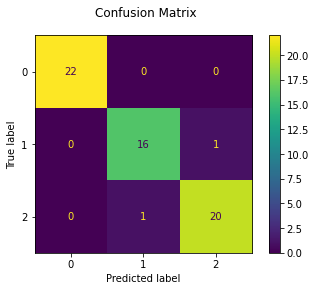

In [32]:
# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

On remarque alors que les erreurs observés au global se concentrent dans la classe 1 et 2, et une analyse plus approfondie peut alors être menée pour déterminer pourquoi ces erreurs se font spécifiquement sur ces classes-là.

#### Ceci conclut notre tutoriel, et sentez-vous libre de jouer avec les paramètres du modèle pour mieux le comprendre !

<span style='color:red'>Ton tuto est bien expliqué, les graphiques sont très bien et l'analyses des réuslats aussi, tu aurais juste pu ajouter quelques commentaires après tes graphiques.</span>